### Project Portfolio: Analyzing Kenya's Fuel Prices across major towns for the past year.

  Currently for the first time in history the fuel prices in Kenya went past the Ksh 200 mark($1.36) per liter affecting           households as cost of goods increased while the midst of a challenging economy.

  The Energy and Petroleum Regulatory Authority (EPRA) plays the role in determining fuel prices in Kenya. On a monthly basis,     EPRA reviews and announces new fuel prices, which are then implemented for the upcoming month.

#### 1.  Problem statement

   Analyzing the fuel prices in comparison to the dollar price  over the period of 1 year across 5 major towns                      **(Nairobi,Mombasa,Kisumu,Nakuru and Eldoret)** which are usually highligheted when EPRA annouce's new price change.
    
   We shall also have a broad look at which towns nationally have the highest and lowest fuel prices. 

#### 2. Data Collection
The fuel price datasets for this project was obtained from epra's site www.epra.go.ke/services/petroleum/petroleum-prices

To obtain dollar prices against the shilling the dataset was obtained from www.investing.com/currencies/usd-kes-historical-data

#### 3.  Formulating Business Questions

1. Among the 5 towns analyzed which has the highest mean fuel prices?
2. Which are the top 10 towns in Kenya have the highest mean fuel prices?
3. Which are the top 10 towns in Kenya have the lowest mean fuel prices?
4. What is the percentage increase of the fuel price over the period?
5. At what percentage has the dollar gained against the shilling over the period?
 
#### 4. Data Cleaning
 Looking for missing values and handling them either by imputing missing values, drop rows or columns with missing data, or leave them, depending on the context.
 
#### 5. Feature Engineering
 This involves creating new columns (features) given the existing dataset columns such as **month,year,day,duration**
#### 6. Exploratory Data Analysis
This invloves examining, summarizing, and visualizing data to gain insights and understanding about the dataset. EDA helps you identify patterns, relationships, anomalies, and potential issues in the data.

### Load Fuel Price Dataset

In [1]:
#Loading required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [204]:
#Load datasets path
folder_path = '.../Fuel Prices Epra'

#Create an empty list to store the DataFrames
dfs=[]
#List all files in the folder
files = os.listdir(folder_path)
 
for file in files:
    if file.endswith('.xlsx'):
        file_path=os.path.join(folder_path, file)
        xls=pd.ExcelFile(file_path)
        for sheet_name in xls.sheet_names:
            df = pd.read_excel(xls, sheet_name=sheet_name)
            dfs.append(df)

# Combine DataFrames into a single DataFrame
fuel_prices_df = pd.concat(dfs, ignore_index=True)

In [2]:
#Save dataframe as an excel csv file
#fuel_prices_df.to_csv('.../Fuel Prices Epra/combined.csv',index=False)
pump_prices=pd.read_csv('.../Fuel Prices Epra/combined.csv')

pump_prices.columns

Index(['Price Period', 'Town', 'Super', 'Diesel', 'Kerosene'], dtype='object')

#### Data Cleaning

In [8]:
from dateutil import parser
#Renaming Columns
pump_prices.rename(columns={'Price Period':'Date'},inplace=True)
#Creating Start Date and End Date Columns
pump_prices['Start_Date']=pump_prices['Date'].str.split('-').str[0]
pump_prices['End_Date']=pump_prices['Date'].str.split('-').str[-1]

# Function to parse dates with fallback to original data
def parse_date(date_str):
    try:
        return parser.parse(date_str).strftime('%Y-%m-%d')
    except ValueError:
        return date_str

# Apply the parsing function to the date columns
pump_prices['Start_Date'] = pump_prices['Start_Date'].apply(parse_date)
pump_prices['End_Date'] = pump_prices['End_Date'].apply(parse_date)

#Covert column values into date time format
# Convert the "Start_Date" column to a datetime format
pump_prices['Start_Date'] = pd.to_datetime(pump_prices['Start_Date'])
# Convert the "End_Date" column to a datetime format
pump_prices['End_Date'] = pd.to_datetime(pump_prices['End_Date'])

#Calculate the duration in days between start_date and End_date
pump_prices['Duration(Days)']=pump_prices['End_Date']-pump_prices['Start_Date']

#Replace wundanji town name to it's correct name Wundanyi
pump_prices['Town']=pump_prices['Town'].replace('wundanji','wundanyi')

In [4]:
#Pump Prices Sorted Database saving as an excel csv file
#pump_prices.to_csv('.../Fuel Prices Epra/combined_sorted.csv',index=False)
pump_prices=pd.read_csv('.../Fuel Prices Epra/combined_sorted.csv')

### Load Dollar Price Dataset

In [88]:
#Specify dataset
folder_path = '.../Fuel Prices Epra/USD history Prices'
#Create an empty list to store DataFrames
dfs=[]

#list all files in the folder
files=os.listdir(folder_path)

for file in files:
    if file.endswith('xlsx'):
        file_path=os.path.join(folder_path,file)
        xls = pd.ExcelFile(file_path)
        for sheet_name in xls.sheet_names:
            df=pd.read_excel(xls,sheet_name=sheet_name)
            dfs.append(df)
#Combine the Dataframes into a single DataFrame
dollar_price_df = pd.concat(dfs,ignore_index=True)
#Save the combined data frame into a csv excel file
#dollar_price_df.to_csv('.../Fuel Prices Epra/USD history Prices/dollar_prices.csv',index=False)
#load the saved dataset
dollar_price_df=pd.read_csv('.../Fuel Prices Epra/USD history Prices/dollar_prices.csv')

In [89]:
#Renaming Column Date to Start_Date
dollar_price_df.rename(columns={'Date':'Start_Date'},inplace=True)
#Convert Start date column into date data type column
dollar_price_df['Start_Date']= pd.to_datetime(dollar_price_df['Start_Date'])


#### Merge Fuel and Dollar Price Dataset

In [90]:
# Merge the two DataFrames based on the 'Start Date' column
combined_df = pd.merge(pump_prices, dollar_price_df, on='Start_Date', how='outer')

In [91]:
#Rename Date column to match the end date column of pump prices
dollar_price_df1=dollar_price_df.rename(columns={'Start_Date':'End_Date'},inplace=True)
#Convert Start date column into date data type column
dollar_price_df['End_Date']= pd.to_datetime(dollar_price_df['End_Date'])

# Merge the two DataFrames based on the 'End Date' column
combined_df1 = pd.merge(pump_prices, dollar_price_df, on=['End_Date'], how='inner')

combined_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2193 entries, 0 to 2192
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype          
---  ------          --------------  -----          
 0   Date            2193 non-null   object         
 1   Town            2193 non-null   object         
 2   Super           2193 non-null   float64        
 3   Diesel          2193 non-null   float64        
 4   Kerosene        2193 non-null   float64        
 5   Start_Date      2193 non-null   datetime64[ns] 
 6   End_Date        2193 non-null   datetime64[ns] 
 7   Duration(Days)  2193 non-null   timedelta64[ns]
 8   Price           2193 non-null   float64        
 9   Open            2193 non-null   float64        
 10  High            2193 non-null   float64        
 11  Low             2193 non-null   float64        
 12  Vol.            1076 non-null   object         
 13  Change %        2193 non-null   float64        
dtypes: datetime64[ns](2), float64(8), object

In [92]:
#Combine the two dataframes now this caputes the dollar prices that fall either on start date or end date
combined_df2 = pd.concat([combined_df, combined_df1], ignore_index=True)

In [93]:
#There duplicate values
combined_df2[combined_df2.duplicated()]
#Drop duplicate values
combined_df2 = combined_df2.drop_duplicates()     

#View Dataset minus Duplicates
combined_df2.head()

#Save the combined dataset into an csv file
#combined_df2.to_csv('.../Fuel Prices Epra/USD history Prices/fuel_dollar_prices1.csv',index=False)
#Load our combined dataset
pump_dollar_prices=pd.read_csv('.../Fuel Prices Epra/USD history Prices/fuel_dollar_prices1.csv')
pump_dollar_prices.head()

,Date,Town,Super,Diesel,Kerosene,Start_Date,End_Date,Duration(Days),Price,Open,High,Low,Vol.,Change %
0,May 15th 2022 - June 14th 2022,Mombasa,147.86,128.76,116.69,2022-05-15,2022-06-14,30 days,NaN,NaN,NaN,NaN,NaN,NaN
1,May 15th 2022 - June 14th 2022,Kilifi,148.57,129.47,117.41,2022-05-15,2022-06-14,30 days,NaN,NaN,NaN,NaN,NaN,NaN
2,May 15th 2022 - June 14th 2022,Likoni Mainland,148.22,129.11,117.05,2022-05-15,2022-06-14,30 days,NaN,NaN,NaN,NaN,NaN,NaN
3,May 15th 2022 - June 14th 2022,Kwale,148.22,129.11,117.05,2022-05-15,2022-06-14,30 days,NaN,NaN,NaN,NaN,NaN,NaN
4,May 15th 2022 - June 14th 2022,Malindi,148.78,129.67,117.61,2022-05-15,2022-06-14,30 days,NaN,NaN,NaN,NaN,NaN,NaN


In [94]:
#Drop columns we don't need
pump_dollar_prices.drop(['Date','Open','High','Low','Vol.','Change %'],axis=1,inplace=True) 

In [95]:
#Rename Price column to Dollar Price as per the fuel price at that time
pump_dollar_prices.rename(columns={'Price':'Dollar_Price'},inplace=True)
#Remove Days string from the Duration(Days) column
pump_dollar_prices['Duration(Days)']=pump_dollar_prices['Duration(Days)'].str.split('days').str[0]

#Drop missing values
pump_dollar_prices.dropna(inplace=True)
pump_dollar_prices.head()

,Town,Super,Diesel,Kerosene,Start_Date,End_Date,Duration(Days),Dollar_Price
596,Mombasa,174.98,159.76,143.69,2023-02-15,2023-03-14,27,125.4
597,Kilifi,175.69,160.47,144.41,2023-02-15,2023-03-14,27,125.4
598,Likoni Mainland,175.34,160.11,144.05,2023-02-15,2023-03-14,27,125.4
599,Kwale,175.34,160.11,144.05,2023-02-15,2023-03-14,27,125.4
600,Malindi,175.90,160.67,144.61,2023-02-15,2023-03-14,27,125.4


In [96]:
#Save our dataset that has been combined with no duplicates and missing values
#pump_dollar_prices.to_csv('.../Fuel Prices Epra/USD history Prices/fuel_dollar_prices1.csv',index=False)
#Load our combined dataset
pump_dollar_prices=pd.read_csv('.../Fuel Prices Epra/USD history Prices/fuel_dollar_prices1.csv')
pump_dollar_prices.head()

,Town,Super,Diesel,Kerosene,Start_Date,End_Date,Duration(Days),Dollar_Price
0,Mombasa,174.98,159.76,143.69,2023-02-15,2023-03-14,27,125.4
1,Kilifi,175.69,160.47,144.41,2023-02-15,2023-03-14,27,125.4
2,Likoni Mainland,175.34,160.11,144.05,2023-02-15,2023-03-14,27,125.4
3,Kwale,175.34,160.11,144.05,2023-02-15,2023-03-14,27,125.4
4,Malindi,175.90,160.67,144.61,2023-02-15,2023-03-14,27,125.4


In [97]:
# Convert the "Start_Date" column to a datetime format
pump_dollar_prices['Start_Date'] = pd.to_datetime(pump_dollar_prices['Start_Date'])
# Convert the "End_Date" column to a datetime format
pump_dollar_prices['End_Date'] = pd.to_datetime(pump_dollar_prices['End_Date'])

#Replace wundanji town name to it's correct name Wundanyi
pump_dollar_prices['Town']=pump_dollar_prices['Town'].replace('Wundanji','Wundanyi')

#### Feature Engineering

In [98]:
#From the Start_Date and End_Date Columns we can derive day/month/year columns numerical values
pump_dollar_prices['(Start_Date)Day_of_week']=pump_dollar_prices['Start_Date'].dt.day_name()
pump_dollar_prices['(Start_Date)Day_of_month']=pump_dollar_prices['Start_Date'].dt.day
pump_dollar_prices['(Start_Date)Month_No']=pump_dollar_prices['Start_Date'].dt.month
pump_dollar_prices['(Start_Date)Year']=pump_dollar_prices['Start_Date'].dt.year

#We Obtain from End_Date the day of week,month,year
pump_dollar_prices['(End_Date)Day_of_week']=pump_dollar_prices['End_Date'].dt.day_name()
pump_dollar_prices['(End_Date)Day_of_month']=pump_dollar_prices['End_Date'].dt.day
pump_dollar_prices['(End_Date)Month_No']=pump_dollar_prices['End_Date'].dt.month
pump_dollar_prices['(End_Date)Year']=pump_dollar_prices['End_Date'].dt.year

In [99]:
#Covert fuel prices categories into numerical values
pump_dollar_prices['Super'] = pd.to_numeric(pump_dollar_prices['Super'], errors='coerce')
pump_dollar_prices['Diesel'] = pd.to_numeric(pump_dollar_prices['Diesel'], errors='coerce')
pump_dollar_prices['Kerosene'] = pd.to_numeric(pump_dollar_prices['Kerosene'], errors='coerce')

#View dataset columns with respective data types
pump_dollar_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3937 entries, 0 to 3936
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Town                      3937 non-null   object        
 1   Super                     3937 non-null   float64       
 2   Diesel                    3937 non-null   float64       
 3   Kerosene                  3937 non-null   float64       
 4   Start_Date                3937 non-null   datetime64[ns]
 5   End_Date                  3937 non-null   datetime64[ns]
 6   Duration(Days)            3937 non-null   int64         
 7   Dollar_Price              3937 non-null   float64       
 8   (Start_Date)Day_of_week   3937 non-null   object        
 9   (Start_Date)Day_of_month  3937 non-null   int64         
 10  (Start_Date)Month_No      3937 non-null   int64         
 11  (Start_Date)Year          3937 non-null   int64         
 12  (End_Date)Day_of_wee

In [100]:
# Create a new column "Date_Range" by combining "Start_Date" and "End_Date"
pump_dollar_prices['Date_Range'] = pump_dollar_prices['Start_Date'].dt.strftime('%Y-%m-%d') + ' - ' + pump_dollar_prices['End_Date'].dt.strftime('%Y-%m-%d')

In [101]:
#Rerranging Columns of the combined fuel and dollar prices
#Rearranging the columns
pump_dollar_prices=pump_dollar_prices[['Town','Super','Diesel','Kerosene','Start_Date','End_Date','(Start_Date)Day_of_week','(Start_Date)Day_of_month','(Start_Date)Month_No','(Start_Date)Year','(End_Date)Day_of_week','(End_Date)Day_of_month','(End_Date)Month_No','(End_Date)Year','Date_Range','Duration(Days)','Dollar_Price']]
#View Dataset 
pump_dollar_prices.head()

,Town,Super,Diesel,Kerosene,Start_Date,End_Date,(Start_Date)Day_of_week,(Start_Date)Day_of_month,(Start_Date)Month_No,(Start_Date)Year,(End_Date)Day_of_week,(End_Date)Day_of_month,(End_Date)Month_No,(End_Date)Year,Date_Range,Duration(Days),Dollar_Price
0,Mombasa,174.98,159.76,143.69,2023-02-15,2023-03-14,Wednesday,15,2,2023,Tuesday,14,3,2023,2023-02-15 - 2023-03-14,27,125.4
1,Kilifi,175.69,160.47,144.41,2023-02-15,2023-03-14,Wednesday,15,2,2023,Tuesday,14,3,2023,2023-02-15 - 2023-03-14,27,125.4
2,Likoni Mainland,175.34,160.11,144.05,2023-02-15,2023-03-14,Wednesday,15,2,2023,Tuesday,14,3,2023,2023-02-15 - 2023-03-14,27,125.4
3,Kwale,175.34,160.11,144.05,2023-02-15,2023-03-14,Wednesday,15,2,2023,Tuesday,14,3,2023,2023-02-15 - 2023-03-14,27,125.4
4,Malindi,175.90,160.67,144.61,2023-02-15,2023-03-14,Wednesday,15,2,2023,Tuesday,14,3,2023,2023-02-15 - 2023-03-14,27,125.4


In [115]:
#Check the duplicates based on specific columns after combining the columns
duplicates=pump_dollar_prices[pump_dollar_prices.duplicated(subset=['Town','Dollar_Price'])]

#Drop the duplicate row
pump_dollar_prices=pump_dollar_prices.drop_duplicates(subset=['Town','Dollar_Price'])


In [116]:
#Save the updated dataset with addded features as an excel csv file
#pump_dollar_prices.to_csv('.../Fuel Prices Epra/USD history Prices/fuel_dollar_prices1.csv',index=False)
#Load our updated  dataset with date range
pump_dollar_prices=pd.read_csv('.../Fuel Prices Epra/USD history Prices/fuel_dollar_prices1.csv')
pump_dollar_prices.head()

,Town,Super,Diesel,Kerosene,Start_Date,End_Date,(Start_Date)Day_of_week,(Start_Date)Day_of_month,(Start_Date)Month_No,(Start_Date)Year,(End_Date)Day_of_week,(End_Date)Day_of_month,(End_Date)Month_No,(End_Date)Year,Date_Range,Duration(Days),Dollar_Price
0,Mombasa,174.98,159.76,143.69,2/15/2023,3/14/2023,Wednesday,15,2,2023,Tuesday,14,3,2023,2023-02-15 - 2023-03-14,27,125.4
1,Kilifi,175.69,160.47,144.41,2/15/2023,3/14/2023,Wednesday,15,2,2023,Tuesday,14,3,2023,2023-02-15 - 2023-03-14,27,125.4
2,Likoni Mainland,175.34,160.11,144.05,2/15/2023,3/14/2023,Wednesday,15,2,2023,Tuesday,14,3,2023,2023-02-15 - 2023-03-14,27,125.4
3,Kwale,175.34,160.11,144.05,2/15/2023,3/14/2023,Wednesday,15,2,2023,Tuesday,14,3,2023,2023-02-15 - 2023-03-14,27,125.4
4,Malindi,175.90,160.67,144.61,2/15/2023,3/14/2023,Wednesday,15,2,2023,Tuesday,14,3,2023,2023-02-15 - 2023-03-14,27,125.4


### Exploratory Data Analysis

#### View the dataset information
 General overview of the dataset

In [117]:
#View the dataset information
pump_dollar_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3936 entries, 0 to 3935
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Town                      3936 non-null   object 
 1   Super                     3936 non-null   float64
 2   Diesel                    3936 non-null   float64
 3   Kerosene                  3936 non-null   float64
 4   Start_Date                3936 non-null   object 
 5   End_Date                  3936 non-null   object 
 6   (Start_Date)Day_of_week   3936 non-null   object 
 7   (Start_Date)Day_of_month  3936 non-null   int64  
 8   (Start_Date)Month_No      3936 non-null   int64  
 9   (Start_Date)Year          3936 non-null   int64  
 10  (End_Date)Day_of_week     3936 non-null   object 
 11  (End_Date)Day_of_month    3936 non-null   int64  
 12  (End_Date)Month_No        3936 non-null   int64  
 13  (End_Date)Year            3936 non-null   int64  
 14  Date_Ran

#### Descriptrive Statistics from our dataset

In [118]:
print('Number of Towns with fuel prices as shared by EPRA :',pump_dollar_prices['Town'].nunique())
pump_dollar_prices.describe()

Number of Towns with fuel prices as shared by EPRA : 227


,Super,Diesel,Kerosene,(Start_Date)Day_of_month,(Start_Date)Month_No,(Start_Date)Year,(End_Date)Day_of_month,(End_Date)Month_No,(End_Date)Year,Duration(Days),Dollar_Price
count,3936.000000,3936.000000,3936.000000,3936.0,3936.000000,3936.000000,3936.0,3936.000000,3936.000000,3936.000000,3936.000000
mean,172.365317,155.978419,142.708041,15.0,5.832825,2022.452998,14.0,6.152947,2022.509909,29.412856,125.660506
std,15.645405,17.215788,17.253605,0.0,3.318808,0.497849,0.0,3.213216,0.499965,5.857913,8.831407
min,130.618042,111.501575,101.290000,15.0,1.000000,2022.000000,14.0,1.000000,2022.000000,27.000000,114.150000
25%,160.640000,141.747500,129.707500,15.0,3.000000,2022.000000,14.0,4.000000,2022.000000,29.000000,118.100000
50%,178.390000,163.260000,147.210000,15.0,6.000000,2022.000000,14.0,7.000000,2023.000000,30.000000,122.900000
75%,181.337500,165.900000,150.022500,15.0,7.000000,2023.000000,14.0,8.000000,2023.000000,30.000000,129.700000
max,208.684201,193.669617,183.485300,15.0,12.000000,2023.000000,14.0,12.000000,2023.000000,392.000000,143.600000


Looking at the fuel prices statistics we find that **Super,Diesel and Kerosene** have mean prices of **ksh173.71,Ksh157.37 and Ksh144.47** respectively.This is from 228 Towns

The **maximum price for Super,Diesel and Kerosene** across the country is **ksh 208.68,ksh193.67 and 183.49** respectively while the **minimum price is Ksh 130.62,Ksh 111.50,Ksh 101.29** for **Super,Diesel and Kerosene.**

The **mean dollar price** in relation to the Kenyan shillings is **Ksh 126.66**

#### Dollar Price Distribution

<Axes: >

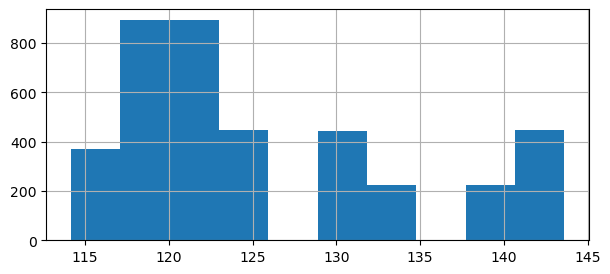

In [119]:
plt.figure(figsize=(7,3))
pump_dollar_prices['Dollar_Price'].hist()

Looking at the dollar price column we find that most are between 117 and 123 dollars. 

#### Question 1 : Among the 5 towns analyzed which has the highest mean fuel prices?

In [120]:
#Selecting the specific towns for our analysis
selected_towns =['Eldoret','Kisumu','Mombasa','Nairobi','Nakuru']
major_towns_data=pump_dollar_prices[pump_dollar_prices['Town'].isin(selected_towns)]

# Calculate the mean fuel prices for the specific towns
round(major_towns_data.groupby(['Town'])['Super','Diesel','Kerosene'].mean(),2)


C:\Users\Mbugua Miiri\AppData\Local\Temp\ipykernel_2724\1133549796.py:6: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  round(major_towns_data.groupby(['Town'])['Super','Diesel','Kerosene'].mean(),2)


,Super,Diesel,Kerosene
Town,,,
Eldoret,170.01,153.72,140.47
Kisumu,170.01,153.70,140.46
Mombasa,167.40,150.73,137.46
Nairobi,169.80,153.08,139.82
Nakuru,169.15,152.85,139.61


Looking the selected towns we are focusing on **Eldoret and Kisumu have the highest mean super price** Eldoret leads when it comes to Diesel and Kerosene price. **Eldoret leads folowed by Kisumu,then Nairobi,Nakuru and Mombasa with the least fuel prices.**

**Mombasa** is a major coastal city and has the largest port in East Africa. It is the entry point for imported fuel and other goods. This makes transportation and distribution costs  lower to other fuel stations.

The Energy and Petroleum Regulatory Authority (Epra) explained that Nakuru pump prices are lower because **petroleum products loaded in Nairobi incur an additional storage charge when they go through the privately owned depots** (source:https://www.standardmedia.co.ke/health/business/article/2001428521/fuel-set-to-cost-less-in-nairobi-as-kpc-plans-truck-loading-facility)



#### Formulating Business Questions¶
    Among the 5 towns analyzed which has the highest mean fuel prices?
    Which are the top 10 towns in Kenya have the highest mean fuel prices?
    Which are the top 10 towns in Kenya have the lowest mean fuel prices.
    What is the percentage increase of the fuel price over the period?
    At what percentage has the dollar gained against the shilling over the period?

#### Question 2: Which are the top 10 towns in Kenya have the highest mean fuel prices?

In [121]:
all_towns_data=pump_dollar_prices.groupby(pump_dollar_prices['Town'])['Super','Diesel','Kerosene'].mean()

# Calculate the overall mean for each town by summing the mean prices for all fuel types
all_towns_data['Overall_Mean'] = all_towns_data.mean(axis=1)

# Sort the towns based on the overall mean  selecting the top 10
top_10_towns =all_towns_data.sort_values(by='Overall_Mean', ascending=False).head(10)

# Display the top 10 towns with the highest overall mean prices
top_10_towns

: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  all_towns_data=pump_dollar_prices.groupby(pump_dollar_prices['Town'])['Super','Diesel','Kerosene'].mean()


,Super,Diesel,Kerosene,Overall_Mean
Town,,,,
Mandera,182.894122,166.181090,152.912517,167.329243
Eldas,180.884336,164.163526,150.902731,165.316864
Elwak,180.559371,163.840783,150.571654,164.990603
Kapenguria,180.500000,163.720000,147.670000,163.963333
Moyale,179.272952,162.556586,149.287458,163.705665
Wajir,179.102637,162.385715,149.125476,163.537943
Tarbaj,178.947987,162.234954,148.958048,163.380330
Kabarnet,179.830000,163.040000,147.010000,163.293333
North Horr,178.646574,161.932986,148.663857,163.081139


The top 10 towns with the highest fuel prices incldue Mandera,Eldas,Elwak,Kapenguria,Moyale,Wajir,Tarbaj,Kabarnet,North and Moi?s Bridge respectively. 

Majority of the towns that the highest fuel prices are from the northern part of Kenya.

#### Question 3: Which are the top 10 towns in Kenya have the lowest mean fuel prices?

In [122]:
all_towns_data=pump_dollar_prices.groupby(pump_dollar_prices['Town'])['Super','Diesel','Kerosene'].mean()

# Calculate the overall mean for each town by summing the mean prices for all fuel types
all_towns_data['Overall_Mean'] = all_towns_data.mean(axis=1)

# Sort the towns based on the overall mean  selecting the top 10
bottom_10_towns =all_towns_data.sort_values(by='Overall_Mean', ascending=False).tail(10)

# Display the top 10 towns with the highest overall mean prices
bottom_10_towns

  all_towns_data=pump_dollar_prices.groupby(pump_dollar_prices['Town'])['Super','Diesel','Kerosene'].mean()


,Super,Diesel,Kerosene,Overall_Mean
Town,,,,
Lungalunga,168.474642,151.803779,138.534028,152.937483
Malindi,168.324176,151.644979,138.383561,152.784238
Kilifi,168.114642,151.442668,138.181250,152.579520
Matuu,168.059310,151.125919,138.366718,152.517316
Taru,167.883223,151.211248,137.951497,152.348656
Kwale,167.761313,151.082672,137.821254,152.221746
Likoni Mainland,167.761313,151.082672,137.821254,152.221746
Samburu,167.702797,151.029712,137.769405,152.167305
Kaloleni,167.553257,150.889060,137.620420,152.020913


Towns near the Port of Mombasa, such as Mombasa,Kaloleni,Samburu,Likoni mainland, Kwale, Taru,Kilifi,Malindi, Lungalunga and Matuu have slightly cheaper fuel prices.

An interesting observation is that Samburu town has cheaper fuel despite being far from the port of mombasa and in an arid area.

#### Question 4: What is the percentage increase of the fuel price over the period?

Formula across the three fuel types:

Percentage Increase in Super Price =  (Final Super Price − Initial Super Price)/Initial Super Price * 100


Percentage Increase in Diesel Price =  (Final Diesel Price − Initial Diesel Price)/Initial Diesel Price * 100

Percentage Increase in Kerosene Price =  (Final Kerosene Price − Initial Kerosene Price)/Initial Kerosene Price * 100

In [123]:
super_increase=(max(pump_dollar_prices['Super']) - min(pump_dollar_prices['Super'])) /min(pump_dollar_prices['Super']) * 100
diesel_increase=(max(pump_dollar_prices['Diesel']) - min(pump_dollar_prices['Diesel'])) /min(pump_dollar_prices['Diesel']) * 100
kerosene_increase=(max(pump_dollar_prices['Kerosene']) - min(pump_dollar_prices['Kerosene'])) /min(pump_dollar_prices['Kerosene']) * 100
print("Super Mean Price Percentage Increase over the last 1 Year: ",round(super_increase,2),'%')
print("Diesel Mean Price Percentage Increase over the last 1 Year: ",round(diesel_increase,2),'%')
print("Kerosene Mean Price Percentage Increase over the last 1 Year: ",round(kerosene_increase,2),'%')

Super Mean Price Percentage Increase over the last 1 Year:  59.77 %
Diesel Mean Price Percentage Increase over the last 1 Year:  73.69 %
Kerosene Mean Price Percentage Increase over the last 1 Year:  81.15 %


Town
Eldoret    170.009245
Kisumu     170.007927
Nairobi    169.798999
Nakuru     169.152672
Mombasa    167.400202
Name: Super, dtype: float64


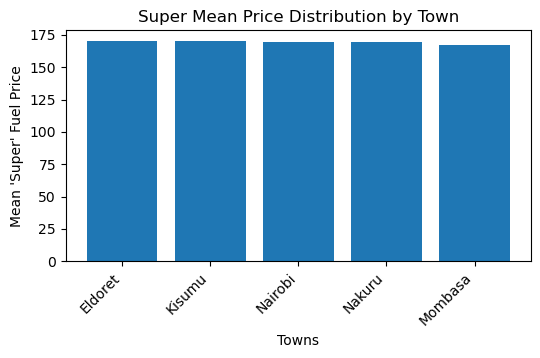

In [124]:
super_mean_prices=major_towns_data.groupby(['Town'])['Super'].mean().sort_values(ascending=False)
print(super_mean_prices)
# Reset the index to make the groupby columns accessible for plotting
super_mean_prices = super_mean_prices .reset_index()

plt.figure(figsize=(6,3))
plt.bar(range(len(super_mean_prices )), super_mean_prices ['Super'], tick_label=super_mean_prices ['Town'])
plt.xlabel("Towns")
plt.ylabel("Mean 'Super' Fuel Price")
plt.title("Super Mean Price Distribution by Town")
plt.xticks(rotation=45, ha='right')
plt.show()

Town
Eldoret    153.715057
Kisumu     153.698186
Nairobi    153.079299
Nakuru     152.852717
Mombasa    150.729339
Name: Diesel, dtype: float64


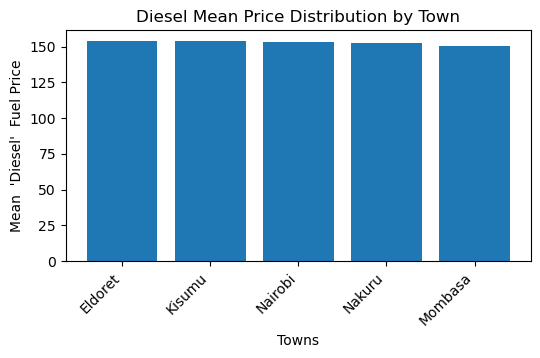

In [125]:
diesel_mean_prices=major_towns_data.groupby(['Town'])['Diesel'].mean().sort_values(ascending=False)
print(diesel_mean_prices)
# Reset the index to make the groupby columns accessible for plotting
diesel_mean_prices = diesel_mean_prices.reset_index()

plt.figure(figsize=(6,3))
plt.bar(range(len(diesel_mean_prices)), diesel_mean_prices['Diesel'], tick_label=diesel_mean_prices['Town'])
plt.xlabel("Towns")
plt.ylabel("Mean  'Diesel'  Fuel Price")
plt.title("Diesel Mean Price Distribution by Town")
plt.xticks(rotation=45, ha='right')
plt.show()

Town
Eldoret    140.467500
Kisumu     140.457849
Nairobi    139.819060
Nakuru     139.614262
Mombasa    137.460143
Name: Kerosene, dtype: float64


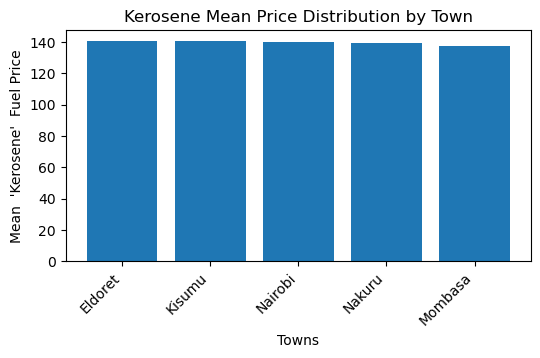

In [126]:
kerosene_mean_prices=major_towns_data.groupby(['Town'])['Kerosene'].mean().sort_values(ascending=False)
print(kerosene_mean_prices)
# Reset the index to make the groupby columns accessible for plotting
kerosene_mean_prices = kerosene_mean_prices.reset_index()

plt.figure(figsize=(6,3))
plt.bar(range(len(kerosene_mean_prices)), kerosene_mean_prices['Kerosene'], tick_label=kerosene_mean_prices['Town'])
plt.xlabel("Towns")
plt.ylabel("Mean  'Kerosene'  Fuel Price")
plt.title("Kerosene Mean Price Distribution by Town")
plt.xticks(rotation=45, ha='right')
plt.show()

#### Question 5: At what percentage has the dollar gained against the shilling over the period?

In [127]:
dollar_increase=round((max(pump_dollar_prices['Dollar_Price']) - min(pump_dollar_prices['Dollar_Price']))/min(pump_dollar_prices['Dollar_Price']) * 100,2)
print("The USD  has increased against the Kenya Shilling by:",dollar_increase,'%')

The USD  has increased against the Kenya Shilling by: 25.8 %
